In [1]:
from qiskit import *
%matplotlib inline

In [2]:
circuit=QuantumCircuit(3,3)

In [3]:
circuit.x(0)
circuit.barrier()
circuit.draw()

┌───┐ ░ 
q_0: ┤ X ├─░─
     └───┘ ░ 
q_1: ──────░─
           ░ 
q_2: ──────░─
           ░ 
c: 3/════════

In [4]:
circuit.h(1)
circuit.cx(1,2)
circuit.barrier()
circuit.draw()

┌───┐ ░            ░ 
q_0: ┤ X ├─░────────────░─
     └───┘ ░ ┌───┐      ░ 
q_1: ──────░─┤ H ├──■───░─
           ░ └───┘┌─┴─┐ ░ 
q_2: ──────░──────┤ X ├─░─
           ░      └───┘ ░ 
c: 3/═════════════════════

In [5]:
circuit.cx(0,1)
circuit.h(0)
circuit.barrier()
circuit.draw()

┌───┐ ░            ░      ┌───┐ ░ 
q_0: ┤ X ├─░────────────░───■──┤ H ├─░─
     └───┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ 
q_1: ──────░─┤ H ├──■───░─┤ X ├──────░─
           ░ └───┘┌─┴─┐ ░ └───┘      ░ 
q_2: ──────░──────┤ X ├─░────────────░─
           ░      └───┘ ░            ░ 
c: 3/══════════════════════════════════

In [6]:
circuit.measure(0,0)
circuit.measure(1,1)
circuit.barrier()
circuit.draw()

┌───┐ ░            ░      ┌───┐ ░ ┌─┐    ░ 
q_0: ┤ X ├─░────────────░───■──┤ H ├─░─┤M├────░─
     └───┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░ 
q_1: ──────░─┤ H ├──■───░─┤ X ├──────░──╫─┤M├─░─
           ░ └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ░ 
q_2: ──────░──────┤ X ├─░────────────░──╫──╫──░─
           ░      └───┘ ░            ░  ║  ║  ░ 
c: 3/═══════════════════════════════════╩══╩════
                                        0  1

In [7]:
circuit.cx(1,2)
circuit.cz(0,2)
circuit.draw()

┌───┐ ░            ░      ┌───┐ ░ ┌─┐    ░         
q_0: ┤ X ├─░────────────░───■──┤ H ├─░─┤M├────░───────■─
     └───┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░       │ 
q_1: ──────░─┤ H ├──■───░─┤ X ├──────░──╫─┤M├─░───■───┼─
           ░ └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ░ ┌─┴─┐ │ 
q_2: ──────░──────┤ X ├─░────────────░──╫──╫──░─┤ X ├─■─
           ░      └───┘ ░            ░  ║  ║  ░ └───┘   
c: 3/═══════════════════════════════════╩══╩════════════
                                        0  1

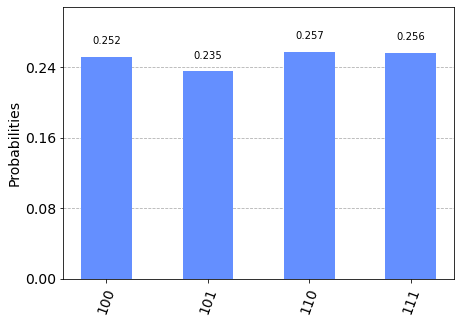

In [8]:
circuit.measure(2,2)
simulator=Aer.get_backend('qasm_simulator')
job=execute(circuit, backend=simulator, shots=1024)
result=job.result()
counts=result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)